In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import BNewmark_DS_GR2_2023_02 as BN

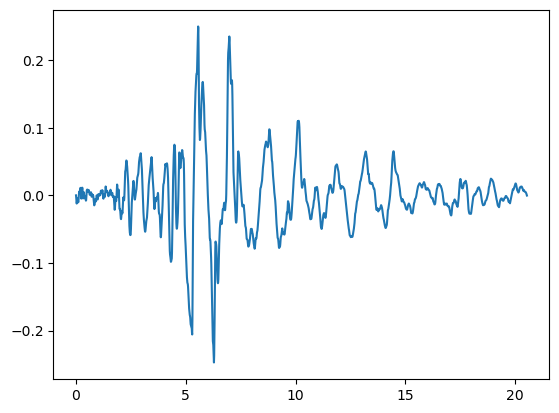

In [8]:
Sismo_direccion = './Sismos/Loma_Prieta_1989.AT2' #1
Sismo_const_direccion = './Sismos/Sg2_data.AT2' #2

data_list1 = []
data_list2 = []

Rows = sum(1 for line in open(Sismo_direccion))

with open(Sismo_direccion, 'r') as file1:
    for line in file1:
        # Split the line into values (assuming they are separated by spaces)
        values1 = line.strip().split()
        # Convert the values to float and append them to the data list
        data_list1.extend([float(value) for value in values1])

with open(Sismo_const_direccion, 'r') as file2:
    for line in file2:
        values2 = line.strip().split()
        data_list2.extend([float(value) for value in values2])

Columns = len(data_list1) // Rows

# Convert the data list into a NumPy array and reshape it
Sismo = np.array(data_list1).reshape(Rows,Columns)
Sismo_const = np.array(data_list2).reshape(1502,2)
Sismo_const = Sismo_const[:1502, :]

tbl_Sismo = pd.DataFrame(Sismo)
tbl_Sismo_const = pd.DataFrame(Sismo_const)

plt.plot(Sismo[:,0],Sismo[:,1])


,0,1
0,0.05,0.106593
1,0.06,0.114480
2,0.07,0.131636
3,0.08,0.201802
4,0.09,0.155799
...,...,...
290,2.95,0.286316
291,2.96,0.286068
292,2.97,0.285821
293,2.98,0.285576


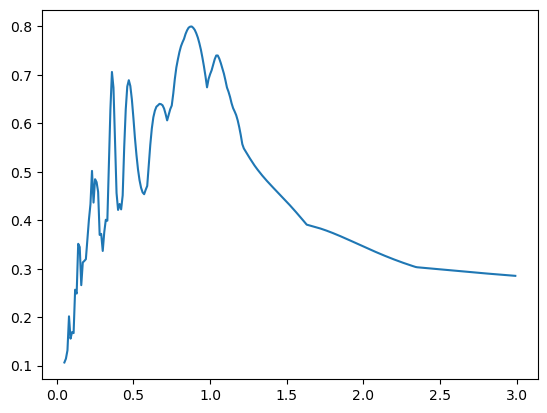

In [9]:
# display(tbl_Sismo)
# display(tbl_Sismo_const)

mult_xn1 = np.zeros((Rows,296))
mult_xvn1 = np.zeros((Rows,296))
mult_xan1 = np.zeros((Rows,296))
Results_acceleration = np.zeros((296,2))

j = 0
for T in np.arange(0.05,3,0.01):
    zi = 0.05
    numcol = 9
    E = 200000
    I = (0.3**4)/12
    L = 3.6
    m = 2*(64*(0.2+0.22+0.35))
    #k = numcol*(12*E*I/(L**3))
    w = 2*np.pi/T
    k = (w**2)*m

    xn1, xvn1, xan1, Sa_max = BN.BNewmarkJr(Sismo, zi, T, m, w)
    xn1c, xvn1c, xan1c, Sa_maxc = BN.BNewmarkJr(Sismo_const, zi, T, m, w)

    mult_xn1[:,j] = xn1
    mult_xvn1[:,j] = xvn1
    mult_xan1[:,j] = xan1
    Results_acceleration[j,0] = T
    Results_acceleration[j,1] = Sa_max
    j+=1

Results_acceleration = Results_acceleration[:-1, :]
tbl_mult_xn1 = pd.DataFrame(mult_xn1)
tbl_Results_acceleration = pd.DataFrame(Results_acceleration)


# display(tbl_mult_xn1)
display(tbl_Results_acceleration)
plt.plot(Results_acceleration[:,0],Results_acceleration[:,1])
plt.savefig('./images/espectros_respuesta/ER_Loma_Prieta_1989.png')

#Tablas
# Resul = pd.DataFrame({ 'Tiempo en s': Sismo_const[:,0], 'Aceleración Sismica en g': Sismo_const[:,1], 'Respuesta en Desplazamiento': xn1, 'Respuesta en velocidad': xvn1, 'Respuesta en aceleración': xan1})
# display(Resul)


# #Graficos
# fig, (ax1, ax2, ax3) =plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(10,8))

# ax1.plot(Sismo_const[:,0], xn1, label='xn1', color='blue')
# ax1.set_ylabel('x en m')
# ax1.set_title('Respuesta en Desplazamiento')

# ax2.plot(Sismo_const[:,0], xvn1, label='xvn1', color='red')
# ax2.set_ylabel('velocidad en m/s')
# ax2.set_title('Respuesta en velocidad')

# ax3.plot(Sismo_const[:,0], xan1, label='xan1', color='orange')
# ax3.plot(Sismo_const[:,0], Sismo_const[:,1], label='Sg2', color='green', linestyle='-.')
# ax3.set_ylabel('acelerción en g')
# ax3.set_xlabel('Tiempo en s')
# ax3.set_title('Respuesta en aceleración')

# # plt.xlim(0, 1)
# #plt.show()